# Part 2A: MNIST using naive Bayes

## Load MNIST dataset

### Download dataset files

In [ ]:
import os,urllib.request
datapath = '../Data/MNISTData/'
if not os.path.exists(datapath):
    os.makedirs(datapath)

urls = ['http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz',
       'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz',
       'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz',
       'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz']

for url in urls:
    filename = url.split('/')[-1]
    if os.path.exists(datapath+filename):
        print(filename, ' already exists')
    else:
        print('Downloading ',filename)
        urllib.request.urlretrieve (url, datapath+filename)
     
print('All files are downloaded for MNIST dataset')


All files are downloaded for MNIST dataset


### Extract files

In [ ]:
import os,gzip,shutil

datapath = '../Data/MNISTData/'  
files = os.listdir(datapath)
for file in files:
    if file.endswith('gz'):
        print('Extracting ',file)
        with gzip.open(datapath+file, 'rb') as f_in:
            with open(datapath+file.split('.')[0], 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)
print('Extraction Complete')

for file in files:
    print('Removing ',file)
    os.remove(datapath+file)
print ('All archives removed')

Extracting  train-images-idx3-ubyte.gz
Extracting  train-labels-idx1-ubyte.gz
Extracting  t10k-labels-idx1-ubyte.gz
Extracting  t10k-images-idx3-ubyte.gz
Extraction Complete
Removing  train-images-idx3-ubyte.gz
Removing  train-labels-idx1-ubyte.gz
Removing  t10k-labels-idx1-ubyte.gz
Removing  t10k-images-idx3-ubyte.gz
All archives removed


### Load files data into a dictionary

In [ ]:
import os,codecs,numpy

datapath = '../Data/MNISTData/'
files = os.listdir(datapath)

def get_int(b):
  return int(codecs.encode(b, 'hex'), 16)

data_dict = {}
for file in files:
    if file.endswith('ubyte'):
        print('Reading ',file)
        with open (datapath+file,'rb') as f:
            data = f.read()
            type = get_int(data[:4])
            length = get_int(data[4:8])
            if (type == 2051):
                category = 'images'
                num_rows = get_int(data[8:12])
                num_cols = get_int(data[12:16])
                parsed = numpy.frombuffer(data,dtype = numpy.uint8, offset = 16)
                parsed = parsed.reshape(length,num_rows,num_cols)
            elif(type == 2049):
                category = 'labels'
                parsed = numpy.frombuffer(data, dtype=numpy.uint8, offset=8)
                parsed = parsed.reshape(length)
            if (length==10000):
                set = 'test'
            elif (length==60000):
                set = 'train'
            data_dict[set+'_'+category] = parsed

print(data_dict.keys())

Reading  train-images-idx3-ubyte
Reading  t10k-images-idx3-ubyte
Reading  train-labels-idx1-ubyte
Reading  t10k-labels-idx1-ubyte
dict_keys(['train_images', 'test_images', 'train_labels', 'test_labels'])


## Classify train data for untouched and stretched images

In [ ]:
train_images = data_dict['train_images']
train_labels = data_dict['train_labels']

STRETCHED_TRAIN_IMAGES = []
TRAIN_IMAGES = []

train0 = []
train1 = []
train2 = []
train3 = []
train4 = []
train5 = []
train6 = []
train7 = []
train8 = []
train9 = []

train0_stretched = []
train1_stretched = []
train2_stretched = []
train3_stretched = []
train4_stretched = []
train5_stretched = []
train6_stretched = []
train7_stretched = []
train8_stretched = []
train9_stretched = []

for i in range (len(train_images)):
  each_image = []
  min_j, min_k, max_j, max_k = 255,255,0,0;

  for j in range (len(train_images[i])):
    for k in range (len(train_images[i])):
      each_image.append(train_images[i][j][k])
      if(train_images[i][j][k] > 0):
        if(j < min_j):
          min_j = j
        if(j > max_j):
           max_j = j
        if(k < min_k):
          min_k = k
        if(k > max_k):
          max_k = k
  TRAIN_IMAGES.append(each_image)
  if train_labels[i] == 0:
    train0.append(each_image)
  elif train_labels[i] == 1:
    train1.append(each_image)
  elif train_labels[i] == 2:
    train2.append(each_image)
  elif train_labels[i] == 3:
    train3.append(each_image)
  elif train_labels[i] == 4:
    train4.append(each_image)
  elif train_labels[i] == 5:
    train5.append(each_image)
  elif train_labels[i] == 6:
    train6.append(each_image)
  elif train_labels[i] == 7:
    train7.append(each_image)
  elif train_labels[i] == 8:
    train8.append(each_image)
  elif train_labels[i] == 9:
    train9.append(each_image)

  val = (20 - (max_j - (min_j-1)))//2
  max_j = max_j + val
  min_j = min_j - val

  val = (20 - (max_k - (min_k-1)))//2
  max_k = max_k + val
  min_k = min_k - val

  max_j += 20 - (max_j - (min_j-1))
  max_k += 20 - (max_k - (min_k-1))

  if(max_j > 27):
    min_j -= (max_j-27)
    max_j = 27

  if(max_k > 27):
    min_k -= (max_k-27)
    max_k = 27

  each_image = []
  for j in range (min_j, max_j+1):
    for k in range (min_k, max_k+1):
      each_image.append(train_images[i][j][k])
  
  STRETCHED_TRAIN_IMAGES.append(each_image)
  if train_labels[i] == 0:
    train0_stretched.append(each_image)
  elif train_labels[i] == 1:
    train1_stretched.append(each_image)
  elif train_labels[i] == 2:
    train2_stretched.append(each_image)
  elif train_labels[i] == 3:
    train3_stretched.append(each_image)
  elif train_labels[i] == 4:
    train4_stretched.append(each_image)
  elif train_labels[i] == 5:
    train5_stretched.append(each_image)
  elif train_labels[i] == 6:
    train6_stretched.append(each_image)
  elif train_labels[i] == 7:
    train7_stretched.append(each_image)
  elif train_labels[i] == 8:
    train8_stretched.append(each_image)
  elif train_labels[i] == 9:
    train9_stretched.append(each_image)

print('Untouched and stretched images generated successfully !')

Untouched and stretched images generated successfully !


## Get label Probabilities

In [ ]:
P_0 = len(train0)/len(train_labels)
P_1 = len(train1)/len(train_labels)
P_2 = len(train2)/len(train_labels)
P_3 = len(train3)/len(train_labels)
P_4 = len(train4)/len(train_labels)
P_5 = len(train5)/len(train_labels)
P_6 = len(train6)/len(train_labels)
P_7 = len(train7)/len(train_labels)
P_8 = len(train8)/len(train_labels)
P_9 = len(train9)/len(train_labels)


print('Successfully generated probabilities !')

Successfully generated probabilities !


## Get mean and variance for each pixel

In [ ]:
import numpy as np


def generateMeanVar(train0, train1, train2, train3, train4, train5, train6, train7, train8, train9): 
  t0 = np.asarray(train0)
  t1 = np.asarray(train1)
  t2 = np.asarray(train2)
  t3 = np.asarray(train3)
  t4 = np.asarray(train4)
  t5 = np.asarray(train5)
  t6 = np.asarray(train6)
  t7 = np.asarray(train7)
  t8 = np.asarray(train8)
  t9 = np.asarray(train9)

  mean_0 = []
  mean_1 = []
  mean_2 = []
  mean_3 = []
  mean_4 = []
  mean_5 = []
  mean_6 = []
  mean_7 = []
  mean_8 = []
  mean_9 = []

  var_0 = []
  var_1 = []
  var_2 = []
  var_3 = []
  var_4 = []
  var_5 = []
  var_6 = []
  var_7 = []
  var_8 = []
  var_9 = []

  for i in range(0,len(train0[0])):
    mean_0.append(np.mean(t0[:,i]))
    mean_1.append(np.mean(t1[:,i]))
    mean_2.append(np.mean(t2[:,i]))
    mean_3.append(np.mean(t3[:,i]))
    mean_4.append(np.mean(t4[:,i]))
    mean_5.append(np.mean(t5[:,i]))
    mean_6.append(np.mean(t6[:,i]))
    mean_7.append(np.mean(t7[:,i]))
    mean_8.append(np.mean(t8[:,i]))
    mean_9.append(np.mean(t9[:,i]))
    if(np.var(t0[:,i]) > 0):
      var_0.append(np.var(t0[:,i]))
    else:
      var_0.append(0.000000000000001)
    if(np.var(t1[:,i]) > 0):
      var_1.append(np.var(t1[:,i]))
    else:
      var_1.append(0.000000000000001)
    if(np.var(t2[:,i]) > 0):
      var_2.append(np.var(t2[:,i]))
    else:
      var_2.append(0.000000000000001)
    if(np.var(t3[:,i]) > 0):
      var_3.append(np.var(t3[:,i]))
    else:
      var_3.append(0.000000000000001)
    if(np.var(t4[:,i]) > 0):
      var_4.append(np.var(t4[:,i]))
    else:
      var_4.append(0.000000000000001)
    if(np.var(t5[:,i]) > 0):
      var_5.append(np.var(t5[:,i]))
    else:
      var_5.append(0.000000000000001)
    if(np.var(t6[:,i]) > 0):
      var_6.append(np.var(t6[:,i]))
    else:
      var_6.append(0.000000000000001)
    if(np.var(t7[:,i]) > 0):
      var_7.append(np.var(t7[:,i]))
    else:
      var_7.append(0.000000000000001)
    if(np.var(t8[:,i]) > 0):
      var_8.append(np.var(t8[:,i]))
    else:
      var_8.append(0.000000000000001)
    if(np.var(t9[:,i]) > 0):
      var_9.append(np.var(t9[:,i]))
    else:
      var_9.append(0.000000000000001)
  
  print('Mean and Variance generated successfully !')
    
  return (mean_0, mean_1, mean_2, mean_3, mean_4, mean_5, mean_6, mean_7, mean_8, mean_9, var_0, var_1, var_2, var_3, var_4, var_5, var_6, var_7, var_8, var_9)
 

## Check accuracy for Test Data using Normal Distribution

In [ ]:
from scipy.stats import norm

test_images = data_dict['test_images']
test_labels = data_dict['test_labels']
no_of_tests = test_images.shape[0]

images = []

for i in range (no_of_tests):
  each_image = []
  for j in range (len(test_images[i])):
    for k in range (len(test_images[i])):
      each_image.append(test_images[i][j][k])
  images.append(each_image)
      
TEST_IMAGES = np.asarray(images)

print('Number of Tests: ', len(TEST_IMAGES))

def getHighestProbability(probs):
  max = probs[0]
  res = 0
  for i in range(1,10):
    if probs[i] > max:
      max = probs[i]
      res = i
  return res

def getAccuracy(TEST_IMAGES, test_labels, distribution, mean_0, mean_1, mean_2, mean_3, mean_4, mean_5, mean_6, mean_7, mean_8, mean_9, var_0, var_1, var_2, var_3, var_4, var_5, var_6, var_7, var_8, var_9, P):
  accuracy = 0
  for i in range(0,100):#len(TEST_IMAGES)
    prob0 = np.log(P[0])
    prob1 = np.log(P[1])
    prob2 = np.log(P[2])
    prob3 = np.log(P[3])
    prob4 = np.log(P[4])
    prob5 = np.log(P[5])
    prob6 = np.log(P[6])
    prob7 = np.log(P[7])
    prob8 = np.log(P[8])
    prob9 = np.log(P[9])
    
    for j in range(0, len(TEST_IMAGES[0])):
      if(distribution == 'normal'):
        prob0+=np.log(norm.pdf(TEST_IMAGES[i,j], mean_0[j], np.sqrt(var_0[j])))
        prob1+=np.log(norm.pdf(TEST_IMAGES[i,j], mean_1[j], np.sqrt(var_1[j])))
        prob2+=np.log(norm.pdf(TEST_IMAGES[i,j], mean_2[j], np.sqrt(var_2[j])))
        prob3+=np.log(norm.pdf(TEST_IMAGES[i,j], mean_3[j], np.sqrt(var_3[j])))
        prob4+=np.log(norm.pdf(TEST_IMAGES[i,j], mean_4[j], np.sqrt(var_4[j])))
        prob5+=np.log(norm.pdf(TEST_IMAGES[i,j], mean_5[j], np.sqrt(var_5[j])))
        prob6+=np.log(norm.pdf(TEST_IMAGES[i,j], mean_6[j], np.sqrt(var_6[j])))
        prob7+=np.log(norm.pdf(TEST_IMAGES[i,j], mean_7[j], np.sqrt(var_7[j])))
        prob8+=np.log(norm.pdf(TEST_IMAGES[i,j], mean_8[j], np.sqrt(var_8[j])))
        prob9+=np.log(norm.pdf(TEST_IMAGES[i,j], mean_9[j], np.sqrt(var_9[j])))
      else: 
        prob0+=np.log(norm.pdf(TEST_IMAGES[i,j], mean_0[j], np.sqrt(var_0[j])))
        prob1+=np.log(norm.pdf(TEST_IMAGES[i,j], mean_1[j], np.sqrt(var_1[j])))
        prob2+=np.log(norm.pdf(TEST_IMAGES[i,j], mean_2[j], np.sqrt(var_2[j])))
        prob3+=np.log(norm.pdf(TEST_IMAGES[i,j], mean_3[j], np.sqrt(var_3[j])))
        prob4+=np.log(norm.pdf(TEST_IMAGES[i,j], mean_4[j], np.sqrt(var_4[j])))
        prob5+=np.log(norm.pdf(TEST_IMAGES[i,j], mean_5[j], np.sqrt(var_5[j])))
        prob6+=np.log(norm.pdf(TEST_IMAGES[i,j], mean_6[j], np.sqrt(var_6[j])))
        prob7+=np.log(norm.pdf(TEST_IMAGES[i,j], mean_7[j], np.sqrt(var_7[j])))
        prob8+=np.log(norm.pdf(TEST_IMAGES[i,j], mean_8[j], np.sqrt(var_8[j])))
        prob9+=np.log(norm.pdf(TEST_IMAGES[i,j], mean_9[j], np.sqrt(var_9[j])))

    res = getHighestProbability([prob0, prob1, prob2, prob3, prob4, prob5, prob6, prob7, prob8, prob9])

    if(res == test_labels[i]):
      accuracy += 1
      
  return accuracy/100#len(TEST_IMAGES)

(mean_0, mean_1, mean_2, mean_3, mean_4, mean_5, mean_6, mean_7, mean_8, mean_9, var_0, var_1, var_2, var_3, var_4, var_5, var_6, var_7, var_8, var_9) = generateMeanVar(train0, train1, train2, train3, train4, train5, train6, train7, train8, train9)
accuracy = getAccuracy(TEST_IMAGES, test_labels, 'normal', mean_0, mean_1, mean_2, mean_3, mean_4, mean_5, mean_6, mean_7, mean_8, mean_9, var_0, var_1, var_2, var_3, var_4, var_5, var_6, var_7, var_8, var_9, [P_0, P_1, P_2, P_3, P_4, P_5, P_6, P_7, P_8, P_9])
print('Accuracy: ', accuracy)

Number of Tests:  10000
Mean and Variance generated successfully !


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: RuntimeWarning:

Accuracy:  0.49


## Generate image for mean values untouched

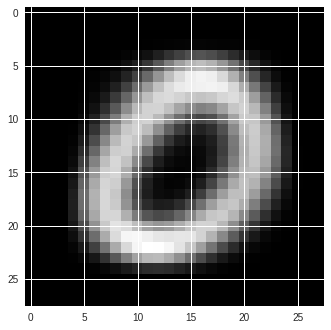

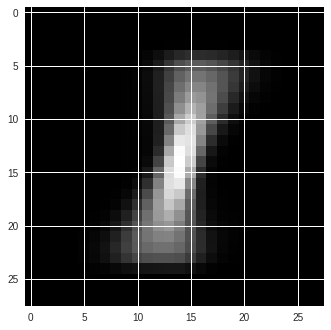

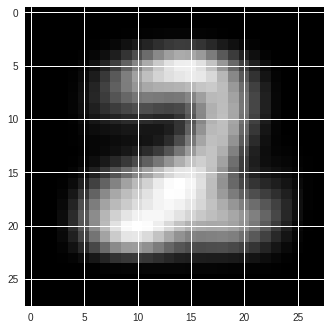

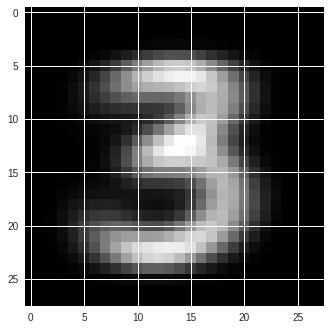

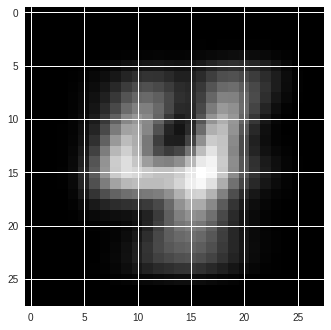

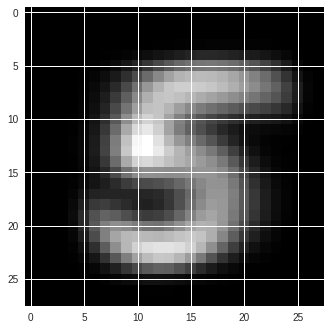

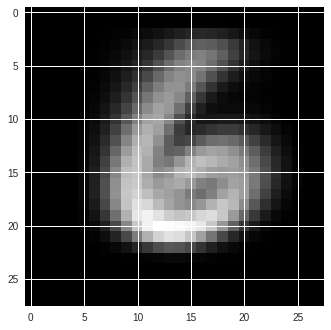

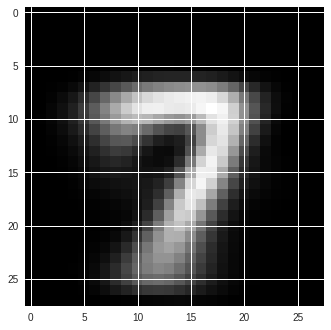

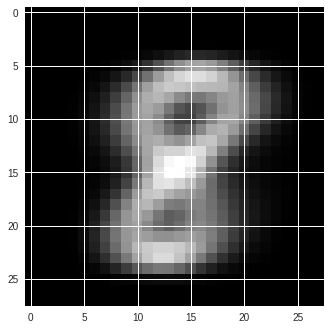

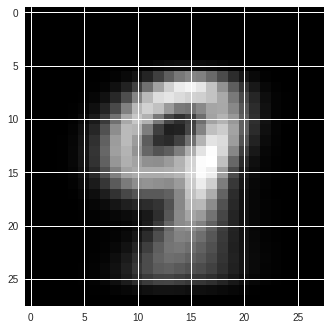

In [ ]:
import matplotlib.pyplot as plt

def generateShape(d, n):
  d.shape=(n, n)
  plt.imshow(d,cmap='gray')
  plt.show()
    
generateShape(np.asarray(mean_0), 28)
generateShape(np.asarray(mean_1), 28)
generateShape(np.asarray(mean_2), 28)
generateShape(np.asarray(mean_3), 28)
generateShape(np.asarray(mean_4), 28)
generateShape(np.asarray(mean_5), 28)
generateShape(np.asarray(mean_6), 28)
generateShape(np.asarray(mean_7), 28)
generateShape(np.asarray(mean_8), 28)
generateShape(np.asarray(mean_9), 28)

## Check accuracy for Test Data using Bernouilli Distribution

## Stretch Test images

In [ ]:
stretched_test_images = []
for i in range (len(test_images)):
  min_j, min_k, max_j, max_k = 255,255,0,0;
  for j in range (len(test_images[i])):
    for k in range (len(test_images[i])):
      if(test_images[i][j][k] > 0):
        if(j < min_j):
          min_j = j
        if(j > max_j):
           max_j = j
        if(k < min_k):
          min_k = k
        if(k > max_k):
          max_k = k
  val = (20 - (max_j - (min_j-1)))//2
  max_j = max_j + val
  min_j = min_j - val

  val = (20 - (max_k - (min_k-1)))//2
  max_k = max_k + val
  min_k = min_k - val

  max_j += 20 - (max_j - (min_j-1))
  max_k += 20 - (max_k - (min_k-1))

  if(max_j > 27):
    min_j -= (max_j-27)
    max_j = 27

  if(max_k > 27):
    min_k -= (max_k-27)
    max_k = 27

  each_image = []
  for j in range (min_j, max_j+1):
    for k in range (min_k, max_k+1):
      each_image.append(test_images[i][j][k])
  stretched_test_images.append(each_image)

print('Test images stretched successfully !')

Test images stretched successfully !


## Check accuracy for Test Data with stretched images using ND

In [ ]:
(str_mean_0, str_mean_1, str_mean_2, str_mean_3, str_mean_4, str_mean_5, str_mean_6, str_mean_7, str_mean_8, str_mean_9, var_0, var_1, var_2, var_3, var_4, var_5, var_6, var_7, var_8, var_9) = generateMeanVar(train0_stretched, train1_stretched, train2_stretched, train3_stretched, train4_stretched, train5_stretched, train6_stretched, train7_stretched, train8_stretched, train9_stretched)
STRETCHED_TEST_IMAGES = np.asarray(stretched_test_images)
accuracy = getAccuracy(STRETCHED_TEST_IMAGES, test_labels, 'normal', str_mean_0, str_mean_1, str_mean_2, str_mean_3, str_mean_4, str_mean_5, str_mean_6, str_mean_7, str_mean_8, str_mean_9, var_0, var_1, var_2, var_3, var_4, var_5, var_6, var_7, var_8, var_9, [P_0, P_1, P_2, P_3, P_4, P_5, P_6, P_7, P_8, P_9])
print('Accuracy: ', accuracy)

Mean and Variance generated successfully !


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log


Accuracy:  0.74


## images with mean values

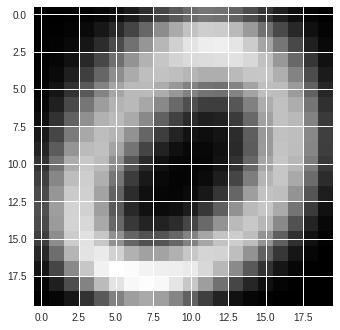

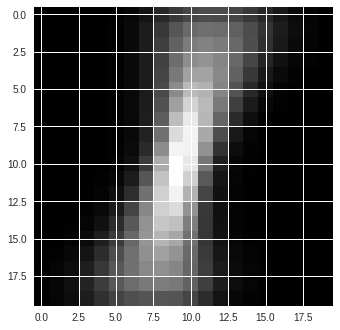

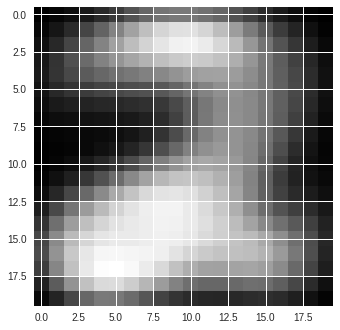

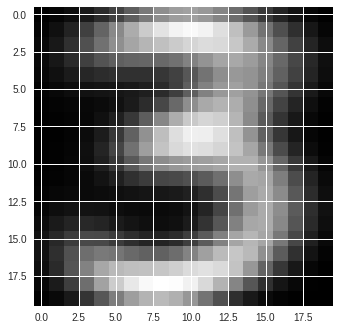

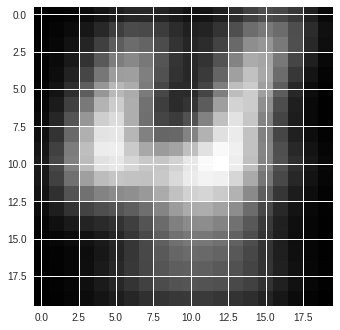

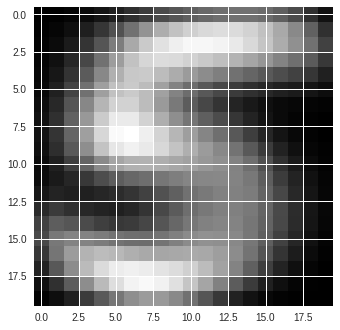

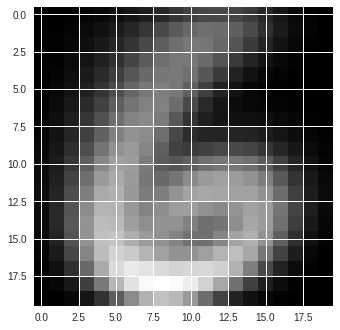

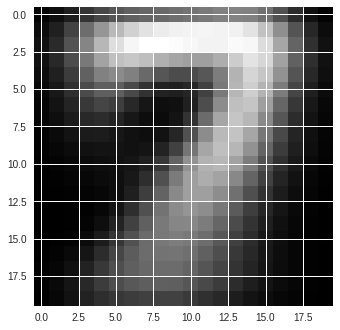

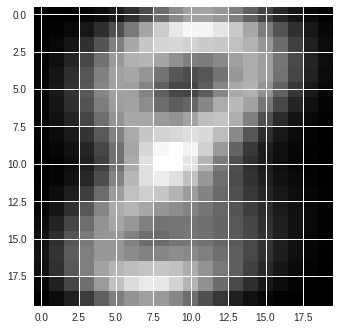

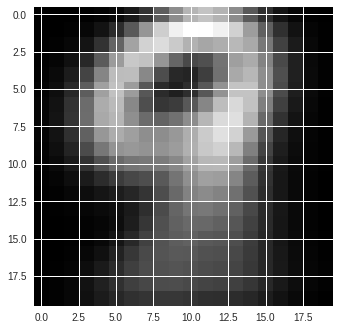

In [ ]:
generateShape(np.asarray(str_mean_0), 20)
generateShape(np.asarray(str_mean_1), 20)
generateShape(np.asarray(str_mean_2), 20)
generateShape(np.asarray(str_mean_3), 20)
generateShape(np.asarray(str_mean_4), 20)
generateShape(np.asarray(str_mean_5), 20)
generateShape(np.asarray(str_mean_6), 20)
generateShape(np.asarray(str_mean_7), 20)
generateShape(np.asarray(str_mean_8), 20)
generateShape(np.asarray(str_mean_9), 20)

## Check accuracy for Test Data  with Stretched images using BD

## Split dataset into train and test

In [ ]:
xtrain = np.asarray(TRAIN_IMAGES)[0:48000,1:]
xtrain_labels = np.asarray(train_labels)[0:48000,0]
xtest = np.asarray(TRAIN_IMAGES)[48000:,1:]
xtest_labels = np.asarray(train_labels)[48000:,0]

xtrain_stretched = np.asarray(STRETCHED_TRAIN_IMAGES)[0:48000,1:]
xtest_stretched = np.asarray(STRETCHED_TRAIN_IMAGES)[48000:,1:]

train0 = []
train1 = []
train2 = []
train3 = []
train4 = []
train5 = []
train6 = []
train7 = []
train8 = []
train9 = []

train0_stretched = []
train1_stretched = []
train2_stretched = []
train3_stretched = []
train4_stretched = []
train5_stretched = []
train6_stretched = []
train7_stretched = []
train8_stretched = []
train9_stretched = []

for i in range(len(xtrain)):
  if xtrain_labels[i] == 0:
    train0.append(xtrain[i])
    train0_stretched.append(xtrain_stretched[i])
  elif xtrain_labels[i] == 1:
    train1.append(xtrain[i])
    train1_stretched.append(xtrain_stretched[i])
  elif xtrain_labels[i] == 2:
    train2.append(xtrain[i])
    train2_stretched.append(xtrain_stretched[i])
  elif xtrain_labels[i] == 3:
    train3.append(xtrain[i])
    train3_stretched.append(xtrain_stretched[i])
  elif xtrain_labels[i] == 4:
    train4.append(xtrain[i])
    train4_stretched.append(xtrain_stretched[i])
  elif xtrain_labels[i] == 5:
    train5.append(xtrain[i])
    train5_stretched.append(xtrain_stretched[i])
  elif xtrain_labels[i] == 6:
    train6.append(xtrain[i])
    train6_stretched.append(xtrain_stretched[i])
  elif xtrain_labels[i] == 7:
    train7.append(xtrain[i])
    train7_stretched.append(xtrain_stretched[i])
  elif xtrain_labels[i] == 8:
    train8.append(xtrain[i])
    train8_stretched.append(xtrain_stretched[i])
  elif xtrain_labels[i] == 9:
    train9.append(xtrain[i])
    train9_stretched.append(xtrain_stretched[i])

IndexError: ignored

## Get label probability for splitted train data

In [ ]:
P_0 = len(train0)/len(xtrain_labels)
P_1 = len(train1)/len(xtrain_labels)
P_2 = len(train2)/len(xtrain_labels)
P_3 = len(train3)/len(xtrain_labels)
P_4 = len(train4)/len(xtrain_labels)
P_5 = len(train5)/len(xtrain_labels)
P_6 = len(train6)/len(xtrain_labels)
P_7 = len(train7)/len(xtrain_labels)
P_8 = len(train8)/len(xtrain_labels)
P_9 = len(train9)/len(xtrain_labels)


## Check accuracy for Train Data using Normal Distribution

In [ ]:
XTEST_IMAGES = np.asarray(xtest)
(mean_0, mean_1, mean_2, mean_3, mean_4, mean_5, mean_6, mean_7, mean_8, mean_9, var_0, var_1, var_2, var_3, var_4, var_5, var_6, var_7, var_8, var_9) = generateMeanVar(train0, train1, train2, train3, train4, train5, train6, train7, train8, train9)
accuracy = getAccuracy(XTEST_IMAGES, xtest_labels, 'normal', mean_0, mean_1, mean_2, mean_3, mean_4, mean_5, mean_6, mean_7, mean_8, mean_9, var_0, var_1, var_2, var_3, var_4, var_5, var_6, var_7, var_8, var_9, [P_0, P_1, P_2, P_3, P_4, P_5, P_6, P_7, P_8, P_9])
print('Accuracy: ', accuracy)

## images with the mean values

## Check accuracy for Train Data using Bernouilli Distribution

## Check accuracy for Train Data with stretched images using ND

In [ ]:
XTEST_STRETCHED = np.asarray(xtest_stretched)
(mean_0, mean_1, mean_2, mean_3, mean_4, mean_5, mean_6, mean_7, mean_8, mean_9, var_0, var_1, var_2, var_3, var_4, var_5, var_6, var_7, var_8, var_9) = generateMeanVar(train0_stretched, train1_stretched, train2_stretched, train3_stretched, train4_stretched, train5_stretched, train6_stretched, train7_stretched, train8_stretched, train9_stretched)
accuracy = getAccuracy(XTEST_STRETCHED, xtest_labels, 'normal', mean_0, mean_1, mean_2, mean_3, mean_4, mean_5, mean_6, mean_7, mean_8, mean_9, var_0, var_1, var_2, var_3, var_4, var_5, var_6, var_7, var_8, var_9, [P_0, P_1, P_2, P_3, P_4, P_5, P_6, P_7, P_8, P_9])
print('Accuracy: ', accuracy)

## Check accuracy for Train Data with stretched images using Bernouilli Distribution

# Problem 2B - MNIST using Decision Forest

## Decision Tree with depth 4

### Untouched images with 10 trees

In [ ]:
from sklearn.ensemble.forest import RandomForestClassifier

np_train_images = np.asarray(TRAIN_IMAGES)

clf=RandomForestClassifier(n_estimators=10, max_depth=4)
clf.fit(np_train_images, train_labels)

p=clf.predict(TEST_IMAGES)

count=0
for i in range(0,len(test_labels)):
  count+=1 if p[i]==test_labels[i] else 0

print("Accuracy Untouched images with 10 trees: ", count/len(test_labels))

Accuracy Untouched images with 10 trees:  0.7534


### Untouched images with 30 trees

In [ ]:

clf=RandomForestClassifier(n_estimators=30, max_depth=4)
clf.fit(np_train_images, train_labels)

p=clf.predict(TEST_IMAGES)

count=0
for i in range(0,len(test_labels)):
  count+=1 if p[i]==test_labels[i] else 0

print("Accuracy Untouched images with 30 trees: ", count/len(test_labels))

Accuracy Untouched images with 30 trees:  0.809


### Stretched images with 10 trees

In [ ]:
np_stretched_train_images = np.asarray(STRETCHED_TRAIN_IMAGES)
STRETCHED_TEST_IMAGES = np.asarray(stretched_test_images)

clf=RandomForestClassifier(n_estimators=10, max_depth=4)
clf.fit(np_stretched_train_images, train_labels)

p=clf.predict(STRETCHED_TEST_IMAGES)

count=0
for i in range(0,len(test_labels)):
  count+=1 if p[i]==test_labels[i] else 0

print("Accuracy Stretched images with 10 trees: ", count/len(test_labels))

Accuracy Stretched images with 10 trees:  0.7666


### Stretched images with 30 trees

In [ ]:
clf=RandomForestClassifier(n_estimators=30, max_depth=4)
clf.fit(np_stretched_train_images, train_labels)

p=clf.predict(STRETCHED_TEST_IMAGES)

count=0
for i in range(0,len(test_labels)):
  count+=1 if p[i]==test_labels[i] else 0

print("Accuracy Stretched images with 30 trees: ", count/len(test_labels))

Accuracy Stretched images with 30 trees:  0.7982


## Decision Tree with depth 16

### Untouched images with 10 trees

In [ ]:
clf=RandomForestClassifier(n_estimators=10, max_depth=16)
clf.fit(np_train_images, train_labels)

p=clf.predict(TEST_IMAGES)

count=0
for i in range(0,len(test_labels)):
  count+=1 if p[i]==test_labels[i] else 0

print("Accuracy Untouched images with 10 trees: ", count/len(test_labels))

Accuracy Untouched images with 10 trees:  0.9452


### Untouched images with 30 trees

In [ ]:
clf=RandomForestClassifier(n_estimators=30, max_depth=16)
clf.fit(np_train_images, train_labels)

p=clf.predict(TEST_IMAGES)

count=0
for i in range(0,len(test_labels)):
  count+=1 if p[i]==test_labels[i] else 0

print("Accuracy Untouched images with 30 trees: ", count/len(test_labels))

Accuracy Untouched images with 30 trees:  0.9625


### Stretched images with 10 trees

In [ ]:
clf=RandomForestClassifier(n_estimators=10, max_depth=16)
clf.fit(np_stretched_train_images, train_labels)

p=clf.predict(STRETCHED_TEST_IMAGES)

count=0
for i in range(0,len(test_labels)):
  count+=1 if p[i]==test_labels[i] else 0

print("Accuracy Stretched images with 10 trees: ", count/len(test_labels))

Accuracy Stretched images with 10 trees:  0.9499


### Stretched images with 30 trees

In [ ]:
clf=RandomForestClassifier(n_estimators=30, max_depth=16)
clf.fit(np_stretched_train_images, train_labels)

p=clf.predict(STRETCHED_TEST_IMAGES)

count=0
for i in range(0,len(test_labels)):
  count+=1 if p[i]==test_labels[i] else 0

print("Accuracy Stretched images with 30 trees: ", count/len(test_labels))

Accuracy Stretched images with 30 trees:  0.9623
